# MA3K7 Assignment 4 

**Student Number: 2110308**

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import binom
from sympy import symbols, solve

The code below uses a binomial function to calculate the probability of landing on step 25 after exactly N flips.

In [9]:
# Probability of getting a 1 (or 2) in a coin toss
p = 0.5

def probability_landing_on_25(flip_count):
    # Initialise probability to zero
    probability = 0
    
    # Calculate probabilities for scenarios where the player lands on step 25
    for twos in range(0, flip_count + 1):  # Number of '2's can range from 0 to flip_count
        ones = flip_count - twos  # Number of '1's is the remainder
        total_steps = 2*twos + ones
        if total_steps == 24: #I am starting at step 1 so only 24 steps needed
            # Calculate the combinations for this configuration
            probability += binom.pmf(twos, flip_count, p)
    return probability

# Calculate probabilities for 12 to 24 flips
flip_counts = np.arange(12, 25)
probabilities = [probability_landing_on_25(flip_count) for flip_count in flip_counts(12, 25)]

The code below plots the results from the code above.

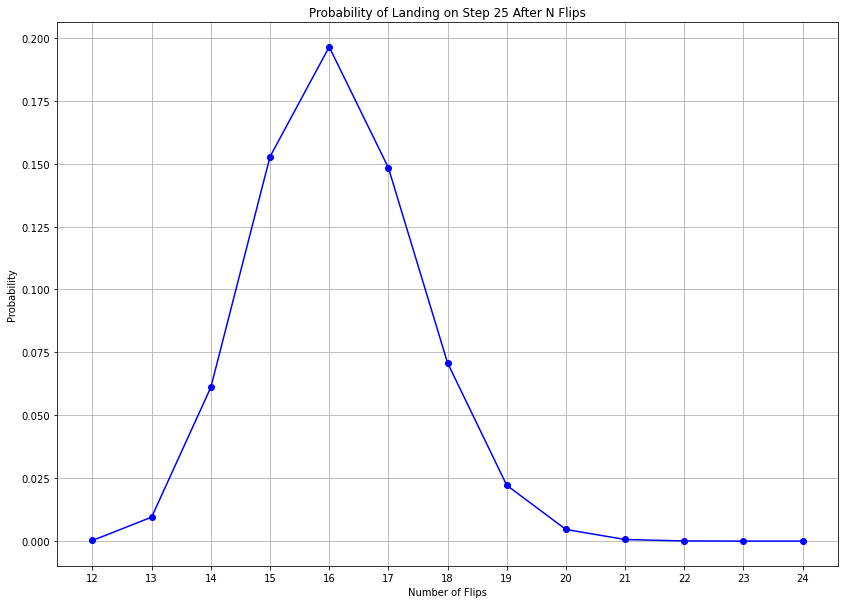

In [11]:
# Plotting the probabilities
plt.figure(figsize=(14, 10))
plt.plot(flip_counts, probabilities, marker='o', linestyle='-', color='b')
plt.title('Probability of Landing on Step 25 After N Flips')
plt.xlabel('Number of Flips')
plt.ylabel('Probability')
plt.xticks(flip_counts)
plt.grid(True)
plt.show()


The code below uses 1M simulations to calculate the probability of landing on step 25 after exactly N flips.

In [14]:
# Adjusting the code to count only simulations where exactly step 25 is stepped on

def simulate_flips_exact_25(max_flips, simulations=1_000_000):
    probabilities = []
    # Loop through each flip count from 12 to max_flips to simulate and calculate probabilities
    for flip_count in range(12, max_flips + 1):
        outcomes = np.random.choice([1, 2], size=(simulations, flip_count))
        total_steps = 1 + np.sum(outcomes, axis=1) #I start the process on step 1
        # Now counting only simulations that exactly reach step 25
        hits = np.count_nonzero(total_steps == 25) 
        probability = hits / simulations
        probabilities.append(probability)
    return probabilities, list(range(12, max_flips + 1))

# Define the maximum number of flips you want to consider for exactly reaching step 25
max_flips = 24
probabilities, flip_counts = simulate_flips_exact_25(max_flips)

The code below plots the results from the code above.

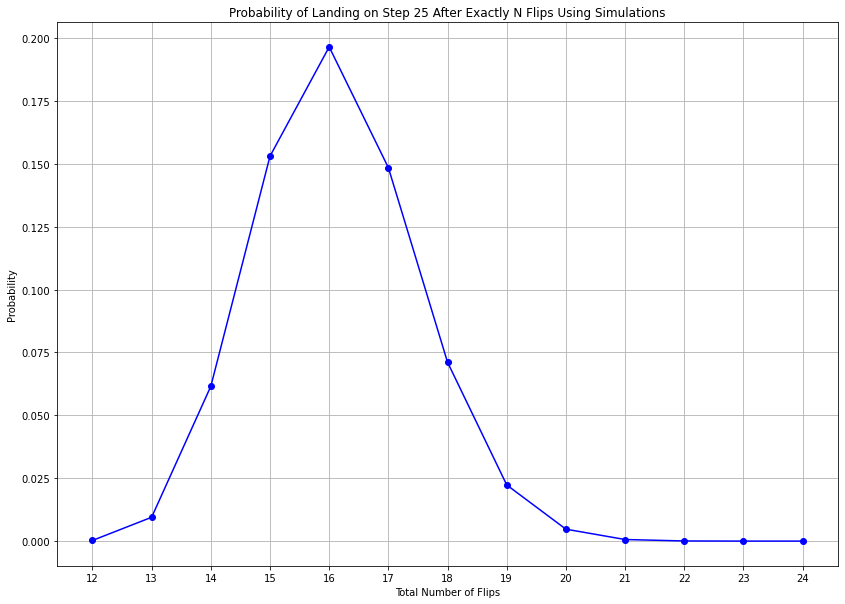

In [15]:
# Plotting the probabilities against the total number of flips taken
plt.figure(figsize=(14, 10))
plt.plot(flip_counts, probabilities, marker='o', linestyle='-', color='b')
plt.title('Probability of Landing on Step 25 After Exactly N Flips Using Simulations')
plt.xlabel('Total Number of Flips')
plt.ylabel('Probability')
plt.xticks(flip_counts)
plt.grid(True)
plt.show()

The code below calculates the cumulative probabilities and plots these against the number of flips.

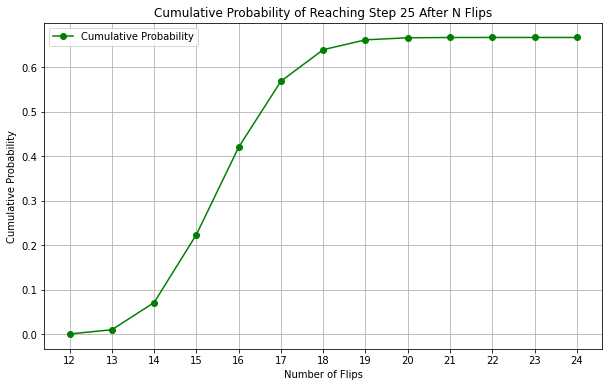

Cumulative Probability of Reaching Step 25 After 24 Flips: 0.6666666865348814


In [24]:
# Adjusted function to calculate cumulative probability of reaching step 25 after N flips
def cumulative_probability_landing_on_25(flip_count):
    cumulative_probability = 0
    for n in range(1, flip_count + 1):
        # Calculate probabilities for scenarios where the player lands on step 25
        for twos in range(0, n + 1):  # Number of '2's can range from 0 to n
            ones = n - twos  # Number of '1's is the remainder
            total_steps = 2 * twos + ones
            if total_steps == 24:  # Considering starting on step 1
                cumulative_probability += binom.pmf(twos, n, p)
    return cumulative_probability

# Probability of getting a 1 (or 2) in a coin toss
p = 0.5

# Calculate cumulative probabilities for 12 to 24 flips
flip_counts = np.arange(12, 25)
cumulative_probabilities = [cumulative_probability_landing_on_25(flip_count) for flip_count in flip_counts]

# Plotting the cumulative probabilities
plt.figure(figsize=(10, 6))
plt.plot(flip_counts, cumulative_probabilities, marker='o', linestyle='-', color='g', label='Cumulative Probability')
plt.title('Cumulative Probability of Reaching Step 25 After N Flips')
plt.xlabel('Number of Flips')
plt.ylabel('Cumulative Probability')
plt.xticks(flip_counts)
plt.grid(True)
plt.legend()
plt.show()

#Extract the cumulative probability after 24 flips and print it.
print(f"Cumulative Probability of Reaching Step 25 After 24 Flips: {cumulative_probability_landing_on_25(24)}")

The code below calculates p(25)

In [25]:
# Solving the recursive formula p(n) = 1 - 0.5*p(n-1) with p(1) = 1 for n = 25

def solve_recursive_formula(n):
    # Base case
    if n == 1:
        return 1
    else:
        # Recursive case
        return 1 - 0.5 * solve_recursive_formula(n-1)

# Solve for n = 25
n = 25
p_n = solve_recursive_formula(n)

print(f"The solution for p({n}) is: {p_n}")



The solution for p(25) is: 0.6666666865348816


The code below finds the limit of the first-order recurrence relation

In [27]:
# Define the symbol
p = symbols('p')

# Define the equation representing the steady state
equation = p - (1 - 0.5 * p)

# Solve the equation
limit = solve(equation, p)

print(f"The limit of the recurrence relation is: {limit[0]}")


The limit of the recurrence relation is: 0.666666666666667


The code below plots graphs illustrating the limits of the recurrence relations created by varying the unfairness of the die.

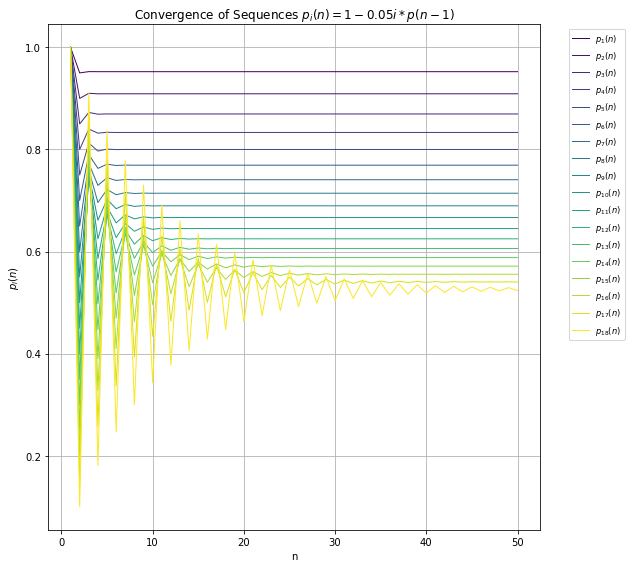

In [28]:
# Redefine the general sequence function with parameter i
def sequence_p_i(n, i, memo={}):
    # Using memoisation to improve performance
    if (n, i) in memo:
        return memo[(n, i)]
    if n == 1:
        return 1
    else:
        memo[(n, i)] = 1 - 0.05 * i * sequence_p_i(n-1, i, memo)
        return memo[(n, i)]

# Generate a range of n values
n_values = np.arange(1, 51)

# Colours for plotting
colors = plt.cm.viridis(np.linspace(0, 1, 18))

# Plot the sequences for each i in 1 to 18
plt.figure(figsize=(12, 8))

for i in range(1, 19):
    p_values = [sequence_p_i(n, i) for n in n_values]
    plt.plot(n_values, p_values, label=f'$p_{{{i}}}(n)$', color=colors[i-1], linestyle='-', marker='', linewidth=1)

# Add labels and legend
plt.title('Convergence of Sequences $p_i(n) = 1 - 0.05i*p(n-1)$')
plt.xlabel('n')
plt.ylabel('$p_i(n)$')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(True)

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.75, 1])

# Show the plot
plt.show()

